In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people()

In [3]:
# 数据的键值对应
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [4]:
# 总有多少数据
faces.data.shape

(13233, 2914)

In [5]:
# 数据图片形式展示的模样
faces.images.shape

(13233, 62, 47)

In [21]:
random_index = np.random.permutation(len(faces.data))
X = faces.data[random_index]

In [22]:
example_faces = X[:10, :]
example_faces.shape

(10, 2914)

In [17]:
# 定义绘制人脸的类
def plot_faces(faces):
#     第一二个参数意思是，绘制图片有几列有几行其，余不知道
    fig, axes = plt.subplots(2, 5, figsize=(10,10),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(faces[i].reshape(62, 47), cmap='bone')
    plt.show()

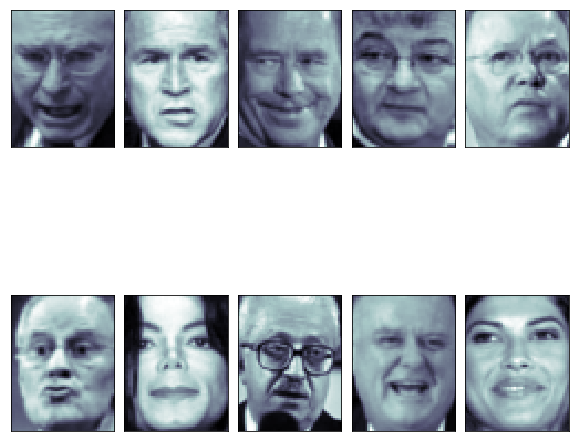

In [23]:
plot_faces(example_faces)

In [24]:
# 人脸的名字
faces.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'],
      dtype='<U35')

In [29]:
# 用PCA弄出特征脸
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized')

In [26]:
%time pca.fit(X)

Wall time: 31.2 s


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
pca.components_.shape

(2914, 2914)

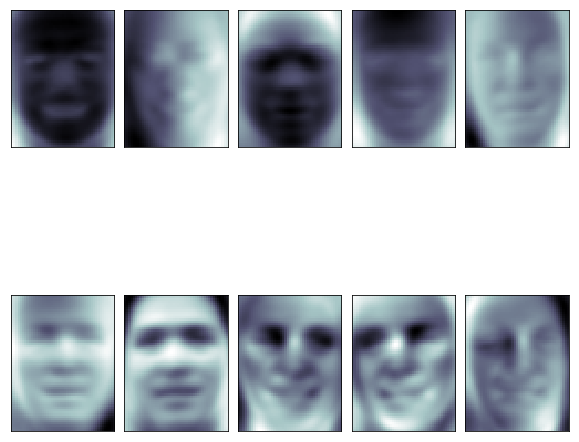

In [28]:
plot_faces(pca.components_[:10,:])